In [1]:
import numpy as np 
from scipy.stats import kstest

# 生成一组样本数据
data = np.random.randn(100)

# KS检验
stat, p = kstest(data, 'norm')  

# 检验结果
print('Statistics=%.3f, p=%.3f' % (stat, p))
# p>0.05,接受原假设,认为样本符合正态分布
# p<0.05,拒绝原假设,认为样本不符合正态分布

if p > 0.05: 
    print('Sample looks Gaussian (fail to reject H0)') 
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.061, p=0.826
Sample looks Gaussian (fail to reject H0)


In [11]:
import pandas as pd
file_name= 'E:/Python20230505/MD-histogram.csv'
data=pd.read_csv(file_name)
data


,MD2021,MD2022
0,250.0,237.0
1,229.0,237.0
2,229.0,237.0
3,229.0,237.0
4,232.0,237.0
...,...,...
16292,NaN,NaN
16293,NaN,NaN
16294,NaN,NaN
16295,NaN,NaN


In [14]:
data_MD_2021=data['MD2021']
MD_2021=data_MD_2021.dropna(how='any')
MD_2021


0      250.0
1      229.0
2      229.0
3      229.0
4      232.0
       ...  
132    250.0
133    250.0
134    250.0
135    253.0
136    253.0
Name: MD2021, Length: 137, dtype: float64

In [16]:
col_arrayMD_2021=MD_2021.to_numpy()
col_arrayMD_2021

array([250., 229., 229., 229., 232., 233., 235., 235., 238., 238., 238.,
       238., 238., 238., 238., 238., 238., 238., 238., 238., 238., 238.,
       238., 238., 238., 238., 238., 238., 239., 239., 239., 239., 239.,
       239., 239., 242., 242., 242., 242., 242., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 244., 244.,
       244., 244., 244., 244., 244., 244., 244., 244., 244., 244., 244.,
       245., 245., 245., 245., 245., 245., 245., 245., 245., 246., 246.,
       246., 246., 246., 246., 246., 246., 246., 246., 246., 246., 246.,
       248., 248., 248., 248., 248., 248., 248., 248., 248., 248., 248.,
       248., 248., 248., 248., 248., 248., 248., 250., 250., 250., 250.,
       250., 250., 250., 253., 253.])

In [17]:
stat, p = kstest(col_arrayMD_2021, 'norm')
# 检验结果
print('Statistics=%.3f, p=%.3f' % (stat, p))
# p>0.05,接受原假设,认为样本符合正态分布
# p<0.05,拒绝原假设,认为样本不符合正态分布

if p > 0.05: 
    print('Sample looks Gaussian (fail to reject H0)') 
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
#以上数据不符合正态分布，不符合正态分布的数据在计算遗传力时需要注意几点:
#遗传力通常假定性状符合正态分布或近似正态分布。如果偏离正态分布较大,遗传力的估计值会产生较大误差,需要谨慎解释。
# 对于非正态分布的数据,可以对数据进行变换,如对数变换或平方变换,使变换后的数据更符合正态分布,然后再基于变换后的数据计算遗传力。
# 但变换会使遗传力的值改变,需要考虑到变换带来的影响。
# 可以选用对非正态分布的数据更为稳健的遗传力估计方法,如基于极限遗传力的非参量方法。这些方法不要求数据符合某种分布,估计值的准确性更高。
# 如果数据的偏离正态分布主要源于少数极端值,可以考虑剔除极端值后重新判断数据分布和计算遗传力。但需要考虑删数据带来的影响。
# 可以同时使用多个方法计算遗传力,如基于极限遗传力的方法与基于方差分析的方法,然后综合考虑不同方法得到的遗传力值的一致性来判断结果的可靠性。
#综上,不符合正态分布的数据在遗传力分析中需要注意方法选择和结果解释。同时运用多种方法可以提高结果的可信度。
#如果数据偏离正态分布较大,建议采用对非正态数据更为稳健的方法,并谨慎解释结果。必要时,可考虑对数据作变换或剔除极端值以获得更符合正态分布的数据。



#这个dataframe的数据问题在于：从这个数据的前几行和后几行可以看出,这个Series存在以下问题:
#1. 包含NaN值。后面几行全是NaN,缺失值较多。
#2. 有重复值,如第2-3行的值都为229。
#3. 只有250-232这几个离散的值,间隔较大,不太连续。
#这些特征表明该Series的质量较低,不太适合直接用于分析。需要先对数据进行处理。
#针对以上问题,可以进行以下处理:
#1. NaN值处理:可以删除包含NaN的行(如果行数较少),或使用填补法(如向前/向后填充)或插值法(如线性插值)填补NaN值。
#2. 重复值处理:可以删除重复行或对重复值进行均值/中位数聚合,保留一条记录。
#3. 区间较大,间隔不连续:可以对数据重新采样,如提取更密集的样本;或者对现有的数据进行插值法进行重采样,增加采样密度。
#4. 查看数据分布,如果偏离正态分布较大,可以进行变换(如对数变换)使其更符合正态分布。或者选择对非正态数据较为稳健的方法进行后续分析。
#5. 进行outlier检测与处理。对异常值进行均值/中位数替代或剔除。


In [ ]:
#原数据的检验如下：

偏态:-0.6274785681338139
峰度:0.5178813057463714


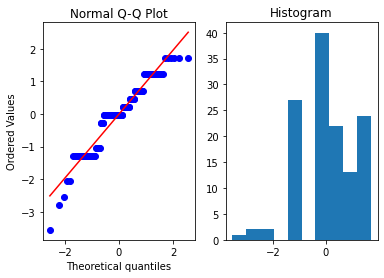

In [23]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

arr = np.array([250., 229., 229., 229., 232., 233., 235., 235., 238., 238., 238.,  
       238., 238., 238., 238., 238., 238., 238., 238., 238., 238., 238.,
       238., 238., 238., 238., 238., 238., 239., 239., 239., 239., 239.,
       239., 239., 242., 242., 242., 242., 242., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 244., 244.,
       244., 244., 244., 244., 244., 244., 244., 244., 244., 244., 244.,     
       245., 245., 245., 245., 245., 245., 245., 245., 245., 246., 246.,
       246., 246., 246., 246., 246., 246., 246., 246., 246., 246., 246.,
       248., 248., 248., 248., 248., 248., 248., 248., 248., 248., 248.,
       248., 248., 248., 248., 248., 248., 248., 250., 250., 250., 250., 
       250., 250., 250., 253., 253.])

# 去除极值
arr = arr[3:-3]  

# 正态参数估计
mu = np.mean(arr)  
sigma = np.std(arr)

# 标准化
z = (arr - mu)/sigma  

# 检验正态性
print(f'偏态:{stats.skew(z)}')  
print(f'峰度:{stats.kurtosis(z)}')

# 作图检查
fig, ax = plt.subplots(1,2)
stats.probplot(z, dist="norm", plot=ax[0])  
ax[0].set_title('Normal Q-Q Plot')
ax[1].hist(z)    
ax[1].set_title('Histogram')
plt.show()

In [ ]:
#鉴于之前数据统计的问题：可以如下进行数据处理以满足正态分布

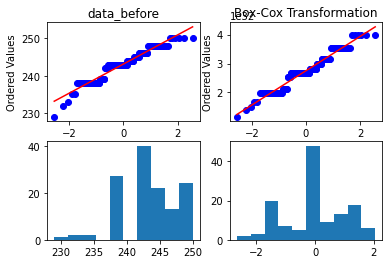

In [29]:

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

arr = np.array([250., 229., 229., 229., 232., 233., 235., 235., 238., 238., 238.,  
       238., 238., 238., 238., 238., 238., 238., 238., 238., 238., 238.,
       238., 238., 238., 238., 238., 238., 239., 239., 239., 239., 239.,
       239., 239., 242., 242., 242., 242., 242., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 244., 244.,
       244., 244., 244., 244., 244., 244., 244., 244., 244., 244., 244.,     
       245., 245., 245., 245., 245., 245., 245., 245., 245., 246., 246.,
       246., 246., 246., 246., 246., 246., 246., 246., 246., 246., 246.,
       248., 248., 248., 248., 248., 248., 248., 248., 248., 248., 248.,
       248., 248., 248., 248., 248., 248., 248., 250., 250., 250., 250., 
       250., 250., 250., 253., 253.])

# 去除极值 
arr = arr[3:-3]

# Box-Cox变换 
z, lmbda = stats.boxcox(arr)
z0 = stats.boxcox(arr, lmbda=0)   # log变换
z05 = stats.boxcox(arr, lmbda=0.5)

# 选择最佳变换参数
skew_z, kurt_z = stats.skew(z), stats.kurtosis(z)  
skew_z0, kurt_z0 = stats.skew(z0), stats.kurtosis(z0)
skew_z05, kurt_z05 = stats.skew(z05), stats.kurtosis(z05)
if (np.abs(skew_z) < 2) & (kurt_z < 7): 
    lz = z 
elif (np.abs(skew_z0) < 2) & (kurt_z0 < 7):  
    lz = z0 
elif (np.abs(skew_z05) < 2) & (kurt_z05 < 7):  
    lz = z05

# 标准化
z_new = (lz - lz.mean())/lz.std()  

# 作图  
fig, ax = plt.subplots(2,2)
stats.probplot(arr, dist="norm", plot=ax[0,0])    
ax[0,0].set_title('data_before')
stats.probplot(lz, dist="norm", plot=ax[0,1])   
ax[0,1].set_title('Box-Cox Transformation')
ax[1,0].hist(arr)      
ax[1,1].hist(z_new)  
plt.show()

pValue: 0.8155912406128757


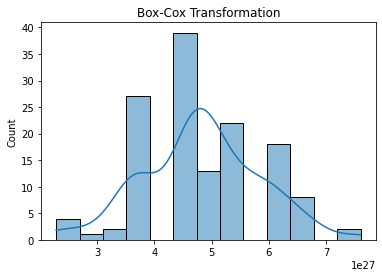

pValue: 0.8155275097893884


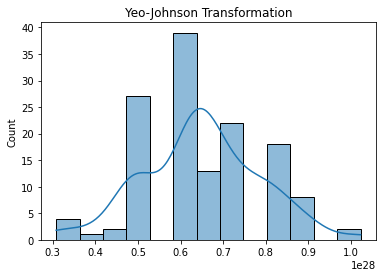

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = np.array([250., 229., 229., 229., 232., 233., 235., 235., 238., 238., 238.,
       238., 238., 238., 238., 238., 238., 238., 238., 238., 238., 238.,
       238., 238., 238., 238., 238., 238., 239., 239., 239., 239., 239.,
       239., 239., 242., 242., 242., 242., 242., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 243., 243., 243.,
       243., 243., 243., 243., 243., 243., 243., 243., 244., 244., 244.,
       244., 244., 244., 244., 244., 244., 244., 244., 244., 244., 245.,
       245., 245., 245., 245., 245., 245., 245., 245., 246., 246., 246.,
       246., 246., 246., 246., 246., 246., 246., 246., 246., 246., 248.,
       248., 248., 248., 248., 248., 248., 248., 248., 248., 248., 248.,
       248., 248., 248., 248., 248., 248., 250., 250., 250., 250., 250.,
       250., 250., 253., 253.])

# Box-Cox变换
data_box_cox, _ = stats.boxcox(data)

# 检验正态性
k2, p = stats.normaltest(data_box_cox)
print("pValue:", p)

# 绘制Box-Cox变换后的分布图
sns.histplot(data_box_cox, kde=True)
plt.title("Box-Cox Transformation")
plt.show()

# Yeo-Johnson变换
data_yeo_johnson, _ = stats.yeojohnson(data)

# 检验正态性
k2, p = stats.normaltest(data_yeo_johnson)
print("pValue:", p)

# 绘制Yeo-Johnson变换后的分布图
sns.histplot(data_yeo_johnson, kde=True)
plt.title("Yeo-Johnson Transformation")
plt.show()